In [21]:
import numpy as np
import cv2
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
import pickle

**Importamos los datos para nuestro modelo:**

In [22]:
Clases = list()
Imagenes_por_Clase = list()

for clase in range(0,len(os.listdir("myData"))):
    
    ruta = os.path.join("myData",str(clase))
    
    for imagen in os.listdir(ruta):
        
        img = cv2.imread(os.path.join(ruta,imagen), cv2.IMREAD_GRAYSCALE) # Recuperamos cada imagen en escala de grises.
        img = cv2.resize(img, (32,32))
        Imagenes_por_Clase.append(img)
        Clases.append(clase)

In [23]:
 # En total hay 10 clases (del 0 al 9). Sin embargo, con la finalidad de revolver los datos, asociamos cada muestra con su respectiva etiqueta:
print(len(Clases))
print(len(Imagenes_por_Clase))

10160
10160


**Convertimos nuestras listas en arreglos para poder usar numpy:**

In [24]:
Imagenes_por_Clase = np.asarray(Imagenes_por_Clase)
Clases = np.asarray(Clases)

In [25]:
print(Imagenes_por_Clase.shape)
print(Clases.shape)

(10160, 32, 32)
(10160,)


In [26]:
from collections import Counter

Cantidad_Imagenes_por_Clase = Counter(Clases)
print(Cantidad_Imagenes_por_Clase)

Counter({0: 1016, 1: 1016, 2: 1016, 3: 1016, 4: 1016, 5: 1016, 6: 1016, 7: 1016, 8: 1016, 9: 1016})


Como se puede observar, por cada clase hay **1016** muestras.

**Dividimos los datos de entrenamiento:**

In [27]:
Imagenes_Entrenamiento, Imagenes_Testeo, Etiquetas_Entrenamiento, Etiquetas_Testeo = train_test_split(Imagenes_por_Clase,
                                                                                                     Clases, test_size=0.2)

In [28]:
Imagenes_Entrenamiento, Imagenes_Validacion, Etiquetas_Entrenamiento, Etiquetas_Validacion = train_test_split(Imagenes_Entrenamiento,
                                                                                                             Etiquetas_Entrenamiento,
                                                                                                             test_size=0.2)

In [29]:
print(Imagenes_Entrenamiento.shape)
print(Etiquetas_Entrenamiento.shape)
############
print('\r')
############
print(Imagenes_Validacion.shape)
print(Etiquetas_Validacion.shape)

(6502, 32, 32)
(6502,)

(1626, 32, 32)
(1626,)


In [30]:
print(Imagenes_Testeo.shape)
print(Etiquetas_Testeo.shape)

(2032, 32, 32)
(2032,)


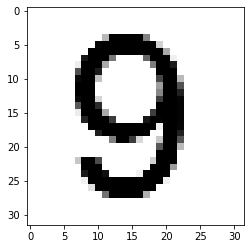

In [31]:
plt.imshow(Imagenes_Entrenamiento[10], cmap="gray")

**Preprocesamos nuestros datos:**

In [33]:
def one_hot_encode(etiquetas):
    """Esta función nos arroja un vector one_hot para cada etiqueta."""
    
    cantidad_clases = len(set(etiquetas))
    vectores_OneHot = np.zeros(shape=(etiquetas.shape[0], cantidad_clases), dtype="float64")
    
    for i in range(vectores_OneHot.shape[0]):
        vectores_OneHot[i,etiquetas[i]] = 1
    return vectores_OneHot

In [37]:
Imagenes_Entrenamiento.resize((6502,32,32,1))
Imagenes_Validacion.resize((1626,32,32,1))
Imagenes_Testeo.resize((2032,32,32,1))

In [38]:
Imagenes_Entrenamiento = Imagenes_Entrenamiento/255
Imagenes_Validacion = Imagenes_Validacion/255
Imagenes_Testeo = Imagenes_Testeo/255

In [39]:
Etiquetas_Entrenamiento = one_hot_encode(Etiquetas_Entrenamiento)
Etiquetas_Validacion = one_hot_encode(Etiquetas_Validacion)
Etiquetas_Testeo = one_hot_encode(Etiquetas_Testeo)

**Debido a que nuestra cantidad de datos es pequeña, haremos uso de la técnica conocida como "Aumento de Datos":**

**Creamos nuestra red neuronal:**

In [40]:
from keras import models
from keras import layers
from keras.layers import BatchNormalization

model = models.Sequential()

model.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(32,32,1), strides=(1,1)))
model.add(layers.MaxPooling2D(pool_size=2, strides=2))
BatchNormalization()
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(filters=64, kernel_size=3, strides=1, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2, strides=2))
BatchNormalization()
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(filters=64, kernel_size=3, strides=1, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2, strides=2))
BatchNormalization()
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
BatchNormalization()
model.add(layers.Dropout(0.5))

model.add(layers.Dense(10, activation='softmax'))

##################################
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

##################################
from timeit import default_timer

start_time = default_timer()


model.fit(Imagenes_Entrenamiento, Etiquetas_Entrenamiento, epochs=10, batch_size=64, 
          validation_data=(Imagenes_Validacion, Etiquetas_Validacion))
"""

history = model.fit_generator(train_datagen.flow(Imagenes_Entrenamiento, Etiquetas_Entrenamiento, batch_size=64),
                             steps_per_epoch=3000,
                             epochs=10,
                             validation_data=(Imagenes_Validacion, Etiquetas_Validacion),
                             shuffle=1
                             )
"""

print(f"Tiempo total de entrenamiento: {np.around(default_timer() - start_time, decimals=4)} seconds")

Train on 6502 samples, validate on 1626 samples
Epoch 1/10
6502/6502 [==============================] - 4s 689us/step - loss: 0.9359 - accuracy: 0.6904 - val_loss: 0.2130 - val_accuracy: 0.9360
Epoch 2/10
6502/6502 [==============================] - 4s 642us/step - loss: 0.1837 - accuracy: 0.9416 - val_loss: 0.1037 - val_accuracy: 0.9656
Epoch 3/10
6502/6502 [==============================] - 4s 654us/step - loss: 0.1121 - accuracy: 0.9609 - val_loss: 0.0677 - val_accuracy: 0.9766
Epoch 4/10
6502/6502 [==============================] - 4s 671us/step - loss: 0.0842 - accuracy: 0.9725 - val_loss: 0.0479 - val_accuracy: 0.9859
Epoch 5/10
6502/6502 [==============================] - 4s 631us/step - loss: 0.0675 - accuracy: 0.9791 - val_loss: 0.0428 - val_accuracy: 0.9859
Epoch 6/10
6502/6502 [==============================] - 4s 638us/step - loss: 0.0474 - accuracy: 0.9859 - val_loss: 0.0420 - val_accuracy: 0.9852
Epoch 7/10
6502/6502 [==============================] - 4s 677us/step - loss

In [41]:
loss, acc = model.evaluate(Imagenes_Testeo, Etiquetas_Testeo)
print(f"Pérdida: {loss}")
print(f"Precisión: {acc}")

2032/2032 [==============================] - 0s 179us/step
Pérdida: 0.013834684189489068
Precisión: 0.9955708384513855


In [42]:
model.save("Modelo_PFinal2.h5")

In [1]:
from keras.models import load_model

model = load_model("Modelo_PFinal2.h5")

Using TensorFlow backend.


In [43]:
import numpy as np
import cv2
import pickle

########### PARAMETERS ##############
width = 640
height = 480
threshold = 0.65 # MINIMUM PROBABILITY TO CLASSIFY
cameraNo = 0
#####################################

#### CREATE CAMERA OBJECT
cap = cv2.VideoCapture(cameraNo)
cap.set(3,width)
cap.set(4,height)

#### LOAD THE TRAINNED MODEL 


#### PREPORCESSING FUNCTION
def preProcessing(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)
    img = img/255
    return img

while True:
    success, imgOriginal = cap.read()
    img = np.asarray(imgOriginal)
    img = cv2.resize(img,(32,32))
    img = preProcessing(img)
    cv2.imshow("Processsed Image",img)
    img = img.reshape(1,32,32,1)
    #### PREDICT
    classIndex = int(model.predict_classes(img))
    #print(classIndex)
    predictions = model.predict(img)
    #print(predictions)
    probVal= np.amax(predictions)
    #print(classIndex,probVal)

    if probVal> threshold:
        cv2.putText(imgOriginal,str(classIndex) + "   "+str(probVal),
                    (50,50),cv2.FONT_HERSHEY_COMPLEX,
                    1,(0,0,255),1)

    cv2.imshow("Original Image",imgOriginal)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break